# Classification of Network protocols/ Network Traffic Classification

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Data preprocessing

In [2]:
df=pd.read_csv('IP_Dataset_original.csv')
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [7]:
'''Modify and write it to another csv file'''
#df.drop(labels=[5,6,15,19,20,21,22,23,40,50,51,52],axis=1,inplace=True)
#df.to_csv('IP_address_DS.csv')

In [2]:
df=pd.read_csv('IP_address_DS.csv')
df.head(50)

,Source.IP,Source.Port,Destination.IP,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,...,Bwd.Packets.s,Max.Packet.Length,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,act_data_pkt_fwd,min_seg_size_forward,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,45523,22,55,132,110414.0,6,...,1208.180480,4380,1435.740260,6.000000,2007.527273,440,21,20,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,1,2,0,12,0.0,6,...,0.000000,6,9.000000,6.000000,0.000000,40,1,20,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,1,3,0,674,0.0,337,...,0.000000,337,337.000000,224.666667,0.000000,96,1,32,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,217,1,3,0,0.0,0,...,13824.884790,0,0.000000,0.000000,0.000000,32,0,32,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,78068,5,0,1076,0.0,529,...,0.000000,529,321.000000,215.200000,0.000000,100,4,20,131,HTTP_PROXY
5,10.200.7.6,3128,172.19.1.56,50004,105069,136,0,313554,0.0,5840,...,0.000000,5840,2316.279412,2305.544118,0.000000,2720,135,20,131,HTTP_PROXY
6,192.168.72.43,55963,10.200.7.7,3128,104443,5,0,1076,0.0,529,...,0.000000,529,321.000000,215.200000,0.000000,100,4,20,131,HTTP_PROXY
7,192.168.10.47,51848,10.200.7.6,3128,11002,3,12,232,3664.0,226,...,1090.710780,3628,259.733333,77.333333,305.333333,72,2,20,130,HTTP_CONNECT
8,68.67.178.197,443,10.200.7.217,57300,108503,10,6,6904,1302.0,1448,...,55.298010,1448,529.000000,690.400000,217.000000,320,7,32,91,SSL
9,192.168.72.43,55977,10.200.7.7,3128,118415,7,0,2210,0.0,1096,...,0.000000,1096,315.714286,315.714286,0.000000,164,5,20,126,GOOGLE


In [3]:
print(df.isnull().values.any())

False


In [4]:
df.dtypes

Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Max            int64
Fwd.Header.Length                int64
Bwd.Header.Length                int64
Bwd.Packets.s                  float64
Max.Packet.Length                int64
Average.Packet.Size            float64
Avg.Fwd.Segment.Size           float64
Avg.Bwd.Segment.Size           float64
Fwd.Header.Length.1              int64
act_data_pkt_fwd                 int64
min_seg_size_forward             int64
L7Protocol                       int64
ProtocolName                    object
dtype: object

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(1048575, 22)

In [7]:
df.describe()

,Source.Port,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Header.Length,Bwd.Header.Length,Bwd.Packets.s,Max.Packet.Length,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,act_data_pkt_fwd,min_seg_size_forward,L7Protocol
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.569082e+04,1.291848e+04,2.112849e+07,5.465246e+01,6.140241e+01,3.470609e+04,9.915793e+04,4.943220e+02,1.471612e+03,1.664243e+03,6.131065e+03,1.376011e+03,2.206537e+02,1.081093e+02,2.779342e+02,1.471612e+03,3.511871e+01,2.590404e+01,9.611647e+01
std,2.267147e+04,2.116656e+04,3.711712e+07,9.892436e+02,1.294176e+03,1.575671e+06,3.023639e+06,1.011026e+03,2.524613e+04,3.605576e+04,7.249751e+04,2.531530e+03,3.774213e+02,2.469246e+02,5.515879e+02,2.524613e+04,8.796298e+02,6.029654e+00,5.484653e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,5.000000e+00
25%,3.128000e+03,4.430000e+02,5.640000e+02,2.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,4.000000e+01,2.000000e+01,7.989698e-02,6.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,2.000000e+01,7.000000e+01
50%,4.698400e+04,3.128000e+03,3.133100e+05,5.000000e+00,4.000000e+00,3.140000e+02,6.900000e+01,1.660000e+02,1.320000e+02,1.200000e+02,3.526770e+00,2.420000e+02,5.789130e+01,3.746667e+01,1.550000e+01,1.320000e+02,2.000000e+00,2.000000e+01,1.260000e+02
75%,5.306000e+04,3.128000e+03,1.992396e+07,1.500000e+01,1.500000e+01,1.702000e+03,3.876000e+03,5.970000e+02,3.920000e+02,4.240000e+02,9.237875e+01,1.608000e+03,2.735238e+02,1.197007e+02,2.760000e+02,3.920000e+02,8.000000e+00,3.200000e+01,1.300000e+02
max,6.553400e+04,6.553400e+04,1.200000e+08,3.286950e+05,5.421960e+05,6.780236e+08,1.345796e+09,2.982000e+04,1.051824e+07,1.284440e+07,4.000000e+06,3.456000e+04,1.606300e+04,1.606000e+04,8.688000e+03,1.051824e+07,3.286940e+05,4.800000e+01,2.220000e+02


### Data visualisation

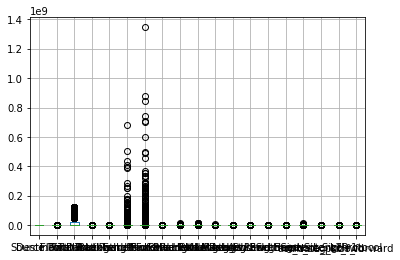

In [8]:
df.boxplot()


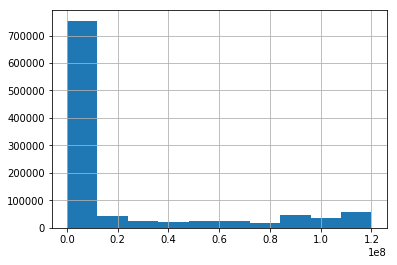

In [9]:
df['Flow.Duration'].hist()

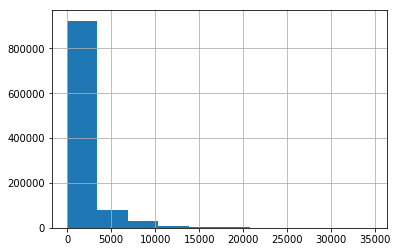

In [10]:
df['Max.Packet.Length'].hist()

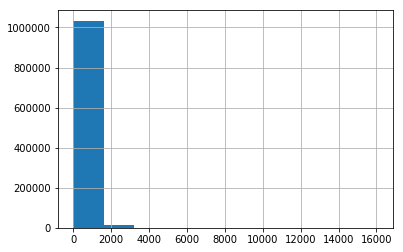

In [11]:
df['Average.Packet.Size'].hist()

In [12]:
df.isnull()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,...,Bwd.Packets.s,Max.Packet.Length,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,act_data_pkt_fwd,min_seg_size_forward,L7Protocol,ProtocolName
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

Source.IP                      0
Source.Port                    0
Destination.IP                 0
Destination.Port               0
Flow.Duration                  0
Total.Fwd.Packets              0
Total.Backward.Packets         0
Total.Length.of.Fwd.Packets    0
Total.Length.of.Bwd.Packets    0
Fwd.Packet.Length.Max          0
Fwd.Header.Length              0
Bwd.Header.Length              0
Bwd.Packets.s                  0
Max.Packet.Length              0
Average.Packet.Size            0
Avg.Fwd.Segment.Size           0
Avg.Bwd.Segment.Size           0
Fwd.Header.Length.1            0
act_data_pkt_fwd               0
min_seg_size_forward           0
L7Protocol                     0
ProtocolName                   0
dtype: int64

Selecting the columns which are non convertable and to be removed

In [14]:
ls=[]
for i in df:
    try:
        df[i] = df[i].astype(int)
    except:
        print(i)
        ls.append(i)

Source.IP
Destination.IP
ProtocolName


In [15]:
ls[:-1]

['Source.IP', 'Destination.IP']

In [16]:
le = preprocessing.LabelEncoder()
for i in ls[:-1]:
    fid = le.fit(df[i])
    fid = le.transform(df[i])
    df[i] = fid

In [17]:
df.isnull().values.any()

False

In [18]:
num_rec=len(df)
num_rec

1048575

In [19]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,...,Bwd.Packets.s,Max.Packet.Length,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,act_data_pkt_fwd,min_seg_size_forward,L7Protocol,ProtocolName
0,492,52422,41,3128,45523,22,55,132,110414,6,...,1208,4380,1435,6,2007,440,21,20,131,HTTP_PROXY
1,34,3128,2598,52422,1,2,0,12,0,6,...,0,6,9,6,0,40,1,20,131,HTTP_PROXY
2,2262,80,36,38848,1,3,0,674,0,337,...,0,337,337,224,0,96,1,32,7,HTTP
3,2262,80,36,38848,217,1,3,0,0,0,...,13824,0,0,0,0,32,0,32,7,HTTP
4,1645,55961,41,3128,78068,5,0,1076,0,529,...,0,529,321,215,0,100,4,20,131,HTTP_PROXY


### Scaling of features

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(df.drop('ProtocolName',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_features = scaler.transform(df.drop('ProtocolName',axis=1))

In [24]:
df_temp=pd.DataFrame(df)

In [25]:
df_temp.drop('ProtocolName',axis=1,inplace=True)

In [26]:
df_temp.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,...,Bwd.Header.Length,Bwd.Packets.s,Max.Packet.Length,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,act_data_pkt_fwd,min_seg_size_forward,L7Protocol
0,492,52422,41,3128,45523,22,55,132,110414,6,...,1100,1208,4380,1435,6,2007,440,21,20,131
1,34,3128,2598,52422,1,2,0,12,0,6,...,0,0,6,9,6,0,40,1,20,131
2,2262,80,36,38848,1,3,0,674,0,337,...,0,0,337,337,224,0,96,1,32,7
3,2262,80,36,38848,217,1,3,0,0,0,...,96,13824,0,0,0,0,32,0,32,7
4,1645,55961,41,3128,78068,5,0,1076,0,529,...,0,0,529,321,215,0,100,4,20,131


In [27]:
df_feat = pd.DataFrame(scaled_features,columns=df_temp.columns)
df_feat.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,...,Bwd.Header.Length,Bwd.Packets.s,Max.Packet.Length,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,act_data_pkt_fwd,min_seg_size_forward,L7Protocol
0,-0.044613,0.737984,-0.910334,-0.462545,-0.568012,-0.033008,-0.004947,-0.021942,0.003723,-0.482997,...,-0.015649,-0.067902,1.186630,3.219111,-0.412662,3.135749,-0.040862,-0.016051,-0.979168,0.636021
1,-0.711252,-1.436292,-0.028066,1.866319,-0.569239,-0.053225,-0.047445,-0.022019,-0.032794,-0.482997,...,-0.046157,-0.084565,-0.541179,-0.560164,-0.412662,-0.503575,-0.056706,-0.038788,-0.979168,0.636021
2,2.531698,-1.570734,-0.912059,1.225024,-0.569239,-0.052214,-0.047445,-0.021598,-0.032794,-0.155606,...,-0.046157,-0.084565,-0.410428,0.309122,0.470481,-0.503575,-0.054488,-0.038788,1.010997,-1.624834
3,2.531698,-1.570734,-0.912059,1.225024,-0.569233,-0.054236,-0.045127,-0.022026,-0.032794,-0.488931,...,-0.043495,0.106118,-0.543550,-0.584016,-0.436969,-0.503575,-0.057023,-0.039924,1.010997,-1.624834
4,1.633628,0.894084,-0.910334,-0.462545,-0.567135,-0.050192,-0.047445,-0.021343,-0.032794,0.034300,...,-0.046157,-0.084565,-0.334585,0.266718,0.434021,-0.503575,-0.054330,-0.035377,-0.979168,0.636021


### Train Test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['ProtocolName'],
                                                    test_size=0.30)

In [30]:
print(y_train)

282975         FACEBOOK
289792           GOOGLE
925590           GOOGLE
5622            YOUTUBE
933309           GOOGLE
859133              SSL
930076           GOOGLE
874521          YOUTUBE
371574       HTTP_PROXY
410489              MSN
43009            GOOGLE
170236           GOOGLE
1040824            HTTP
544499             HTTP
496170              SSL
323483           GOOGLE
302639          YOUTUBE
1021749            HTTP
869508              SSL
156388              SSL
561875       HTTP_PROXY
397697           GOOGLE
801875       HTTP_PROXY
471342           AMAZON
64042            GOOGLE
69124            GOOGLE
72438            GOOGLE
131230          YOUTUBE
792405             HTTP
1030862          GOOGLE
               ...     
21143      HTTP_CONNECT
480184          YOUTUBE
189431           GOOGLE
562329       HTTP_PROXY
800642     HTTP_CONNECT
273523     HTTP_CONNECT
49752      HTTP_CONNECT
134320          YOUTUBE
249989       HTTP_PROXY
714987           GOOGLE
1011771         

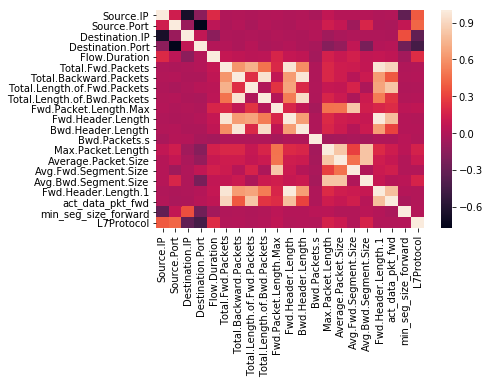

In [31]:
sns.heatmap(df.corr())

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
predictions = dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,predictions))

[[ 4559     0     0 ...     0     0     0]
 [    0   628     0 ...     0     0     0]
 [    0     0   102 ...     0     0     0]
 ...
 [    0     0     0 ...  3729     0     0]
 [    0     0     0 ...     0  2177     0]
 [    0     0     0 ...     0     0 13797]]


In [38]:
print(classification_report(y_test,predictions))


                   precision    recall  f1-score   support

           AMAZON       1.00      1.00      1.00      4559
            APPLE       1.00      1.00      1.00       628
     APPLE_ICLOUD       1.00      1.00      1.00       102
     APPLE_ITUNES       1.00      1.00      1.00       116
           CITRIX       1.00      1.00      1.00         3
       CLOUDFLARE       1.00      1.00      1.00      1256
    CONTENT_FLASH       1.00      1.00      1.00       498
           DEEZER       1.00      1.00      1.00         4
              DNS       1.00      1.00      1.00       169
          DROPBOX       1.00      1.00      1.00      2026
         EASYTAXI       1.00      1.00      1.00         9
             EBAY       1.00      1.00      1.00       115
          EDONKEY       0.50      1.00      0.67         1
         FACEBOOK       1.00      1.00      1.00      2109
         FTP_DATA       1.00      1.00      1.00        12
            GMAIL       1.00      1.00      1.00      2

In [39]:
a2=X_test[2038:2039]

In [40]:
dtree.predict(a2)

array(['HTTP_PROXY'], dtype=object)